### 순방향 연산

In [561]:
import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

### 활성화 함수로 시그모이드 함수 지정

In [562]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

![](2024-01-30-19-15-40.png)

### W : 원래는 학습이 완료된 가중치를 사용해야하나 지금은 가중치를 랜덤하게 선택하자

In [563]:
W = np.random.random((1, 3))
W

array([[0.39992735, 0.0397469 , 0.51239624]])

In [564]:
W = 2*np.random.random((1, 3)) -1
# 음의 값을 구하기 위해  곱하기2 와 -1도 설정
W

array([[ 0.50613465,  0.9434153 , -0.78107143]])

In [565]:
# matmul : 두 배열의 메트릭스 곱
# [0, 0, 1] X [ 0.44386512, -0.36776674, -0.51760221]
np.matmul(W, X[0])

array([-0.78107143])

### 추론

In [566]:
N = 4

for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    print(v)

[-0.78107143]
[0.16234387]
[-0.27493677]
[0.66847852]


### 지도 학습

In [567]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [0], [1], [1]])

![](2024-01-30-19-30-40.png)
- 너비 스케일링 : 노드의 숫자가 늘어난 것
- 깊이 스케일링 : 레이어의 숫자가 늘어난 것
- 해상도 스케일링 : 채널의 숫자가 늘어난 것
- 컴파운드 스케일링 : 전체적으로 다 늘어난 것

### 간단한 딥러닝 학습 절차
![](2024-01-30-19-34-57.png)

### 모델 출력을 계산해주는 함수

In [568]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

In [569]:
def calc_error(d, y):
    e = d - y
    # 오차 = 정답 - 추론값
    delta = y * (1 - y) * e
    # delta : 오차와 활성화 함수의 미분값
    # 미분값이 있어야 방향을 잡으므로 오차와 활성화 함수의 미분값인 델타가 가중치에 반영이 된 것

    return delta

### gradient decent
- 기존 뉴럴넷이 가중치 파라미터들을 최적화하는 방법
- 학습데이터를 전부다 읽고 최적의 1스텝으로 진행

In [570]:
def delta_GD(W, X, D, alpha):
                    # alpha : learning_rate
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calc_output(W, x)
        delta = calc_error(d, y)

        dW = alpha * delta * x
        W = W + dW

    return W

### 가중치 랜덤 초기화 및 학습

In [571]:
W = 2*np.random.random((1, 3)) -1
W

array([[-0.20136038, -0.40066613, -0.52503247]])

In [572]:
alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[ 0.05930932 -0.3196078  -0.38985448]]
[[ 0.32345421 -0.24658853 -0.27306892]]
[[ 0.56452616 -0.19611393 -0.19937195]]
[[ 0.77173764 -0.17031844 -0.17262405]]
[[ 0.94910063 -0.16247044 -0.18097639]]
[[ 1.10411578 -0.1652505  -0.21114137]]
[[ 1.24277277 -0.1735318  -0.25355594]]
[[ 1.36908975 -0.18419404 -0.30219038]]
[[ 1.48567864 -0.19546159 -0.35342174]]
[[ 1.5942699  -0.20638336 -0.40513133]]
[[ 1.69605754 -0.21649408 -0.45611431]]
[[ 1.79190714 -0.22560563 -0.50571363]]
[[ 1.88247824 -0.23368202 -0.55359738]]
[[ 1.96829646 -0.24076615 -0.5996246 ]]
[[ 2.04979627 -0.24693781 -0.64376487]]
[[ 2.12734709 -0.2522903  -0.68605029]]
[[ 2.20126953 -0.25691794 -0.72654696]]
[[ 2.27184599 -0.26090973 -0.76533802]]
[[ 2.33932777 -0.26434663 -0.80251377]]
[[ 2.40394022 -0.26730065 -0.83816583]]
[[ 2.46588648 -0.26983502 -0.87238385]]
[[ 2.52535047 -0.27200479 -0.90525375]]
[[ 2.58249919 -0.2738577  -0.93685678]]
[[ 2.63748474 -0.27543502 -0.96726921]]
[[ 2.69044596 -0.27677238 -0.99656222]]


In [573]:
N = 4

for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    print(y)

[0.01019988]
[0.00829479]
[0.99324149]
[0.99168629]


### XOR

In [574]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])

### 가중치 초기화

In [575]:
W = 2*np.random.random((1, 3)) -1
W

array([[-0.40315601, -0.61528149,  0.13972853]])

### 학습

In [576]:
alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[-0.3596005  -0.56336669  0.19642671]]
[[-0.32972487 -0.5224634   0.23543217]]
[[-0.30968335 -0.48992561  0.2612589 ]]
[[-0.29646329 -0.46355265  0.27764989]]
[[-0.28789695 -0.4416877   0.28741448]]
[[-0.28247699 -0.42313318  0.29257294]]
[[-0.27916869 -0.40703682  0.29455152]]
[[-0.27726486 -0.39279462  0.29434922]]
[[-0.27628277 -0.37997789  0.29266361]]
[[-0.27589322 -0.36828095  0.28998122]]
[[-0.2758721  -0.35748434  0.2866412 ]]
[[-0.27606735 -0.34742903  0.28287986]]
[[-0.27637644 -0.33799854  0.27886175]]
[[-0.27673086 -0.32910634  0.27470126]]
[[-0.2770855  -0.32068713  0.27047777]]
[[-0.27741134 -0.31269073  0.26624613]]
[[-0.2776904  -0.30507773  0.26204401]]
[[-0.27791221 -0.29781654  0.2578971 ]]
[[-0.27807145 -0.29088121  0.25382264]]
[[-0.27816622 -0.28424996  0.24983197]]
[[-0.27819695 -0.27790411  0.24593231]]
[[-0.27816552 -0.27182732  0.24212795]]
[[-0.27807478 -0.26600508  0.23842117]]
[[-0.27792813 -0.26042427  0.23481282]]
[[-0.27772928 -0.25507295  0.23130274]]


### 결과는 제대로된 예측 불가능

In [577]:
N = 4

for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)
    print(y)

[0.52965337]
[0.5]
[0.47034663]
[0.44090112]


### 다시 새로운 구조

In [578]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    return y, y1

![](2024-01-31-13-23-00.png)

### 출력층의 델타 계산

In [579]:
def calc_delta(d, y):
    e = d - y
    # 오차 = 정답 - 추론값
    delta = y * (1 - y) * e
    # delta : 오차와 활성화 함수의 미분값
    # 미분값이 있어야 방향을 잡으므로 오차와 활성화 함수의 미분값인 델타가 가중치에 반영이 된 것

    return delta

### 은닉층의 델타 계산

In [580]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1 - y1) * e1

    return delta1

![](2024-01-30-20-31-35.png)

### 역전파 코드

In [581]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :]
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

### 데이터 준비 및 가중치 핸덤 초기화

In [582]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])

In [583]:
W1 = 2 * np.random.random((4, 3)) -1
# 가중치가 3개에서 4개로 바뀌므로 4, 3 설정
W2 = 2 * np.random.random((1, 4)) -1
# 가중치가 4개에서 1개로 바뀌므로 1, 4 설정

### 학습 및 테스트

In [584]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [585]:
N = 4
for k in range(4):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.00678611]
[0.9892016]
[0.98896976]
[0.0163552]


### cross_entropy
![](2024-01-31-13-53-39.png), ![](2024-01-31-13-53-59.png)

### 출력층의 delta : cross_entropy
- 오차가 델타와 같다

In [586]:
def calcDelta_ce(d, y):
    e = d - y
    delta = e

    return delta

### 은닉층의 delta : sigmoid 

In [587]:
def calcdelta1_ce(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1 - y1) * e1

    return delta1

### 출력값을 cross_entropy 하여 다시 역전파

In [588]:
def backpropCE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :]
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calcDelta_ce(d, y)
        delta1 = calcdelta1_ce(W2, delta, y1)

        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

### 가중치 초기화 및 학습

In [589]:
W1 = 2 * np.random.random((4, 3)) -1
# 가중치가 3개에서 4개로 바뀌므로 4, 3 설정
W2 = 2 * np.random.random((1, 4)) -1
# 가중치가 4개에서 1개로 바뀌므로 1, 4 설정

In [590]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backpropCE(W1, W2, X, D, alpha)

### 테스트
- 출력값 델타를 sigmoid로 설정한 값보다 cross_entropy한 값이 정확도가 더 높다
- 활성화 함수만 바꾸어주더라도 성능이 굉장히 달라질 수도 있다

In [591]:
N = 4
for k in range(4):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[6.74533679e-05]
[0.99988569]
[0.99974982]
[0.00037351]


### 예상 숫자 맞춰보기

In [592]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

### Softmax 함수
- 분류될 클래스가 n개라 할 때 각 클래스에 속할 확률을 추정하고 가장 높은 확률의 클래스를 결과값으로 반환한다
![](2024-01-29-19-32-30.png)

### np.subtract : 두 배열의 요소별 빼기를 위해 NumPy 라이브러리에서 제공하는 함수

In [593]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

result = np.subtract(arr1, arr2)
print(result)

[-3 -3 -3]


In [594]:
def Softmax(x):
    x= np.subtract(x, np.max(x))
    # 여기선 지수증가적인 특징을 방지 즉, x값을 작게 배치하여 최종적으로는 y값을 작게 만들어 연산값이 너무 큰 것을 방지하기 위해 사용
    ex = np.exp(x)

    return ex/np.sum(ex)

### 훈련용 데이터 

In [595]:
X = np.zeros((5, 5, 5))

# 자체 one_hot_encoding
X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]

D = np.array([[[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]])

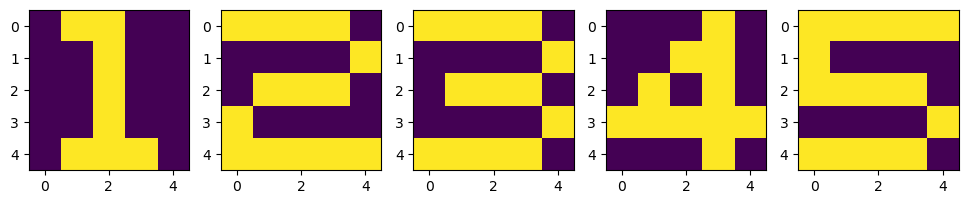

In [596]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

### ReLu
- 역전파에서 sigmoid는 소실될 수 있는 문제가 있어 ReLu를 사용
- ![](2024-01-29-18-32-41.png)
- ![](2024-01-29-18-33-03.png), ![](2024-01-29-18-33-18.png)

In [597]:
def ReLU(x):
    return np.maximum(0, x)

### ReLU를 이용한 정방향 계산

In [598]:
def calcOutput_ReLU(W1 ,W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, y1, v1, y2, v2, y3, v3

### 역전파(델타구하기)

In [599]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3 

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1 ,delta2, delta3

### 가중치 계산
- 기존(기존 이후는 이전의) 가중치를 이용하여 epoch 증가시의 가중치 계산

In [600]:
def CalcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4

    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3

    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2

    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

### 가중치 업데이트
- Gradient Desent 방법 사용, 모든 학습데이터를 사용

In [601]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        # 선방향 출력
        delta, delta1, delta2, delta3 =  backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        # 역전파(델타구하기)
        W1, W2, W3, W4 = CalcWs(alpha, delta, delta1, delta2, 
                                delta3, y1, y2, y3, x, W1, W2, W3, W4)
        # 가중치 갱신
        
    return W1, W2, W3, W4

### 가중치 초기화 및 10,000번의 학습

In [602]:
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

C:\Users\user\AppData\Local\Temp\ipykernel_16748\3980391926.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

### 훈련데이터 검증

In [603]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [604]:
N = 5

for k in range(N):
    x = np.reshape(X[:, :, k], (25, 1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)

    print('Y = {}'.format(k + 1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('='*20)

Y = 1
[1]
[[9.99961060e-01]
 [1.05222366e-05]
 [2.83071260e-05]
 [1.06058958e-08]
 [9.99095098e-08]]
Y = 2
[2]
[[2.31427808e-06]
 [9.99997686e-01]
 [3.33083288e-11]
 [3.98385500e-16]
 [3.64379169e-20]]
Y = 3
[3]
[[2.27439633e-06]
 [1.37438239e-07]
 [9.99973046e-01]
 [1.56740821e-05]
 [8.86797556e-06]]
Y = 4
[4]
[[7.57832402e-06]
 [2.03013540e-19]
 [1.23397979e-10]
 [9.99992066e-01]
 [3.55621061e-07]]
Y = 5
[5]
[[4.01201775e-07]
 [4.94699775e-37]
 [3.70405688e-15]
 [5.11170538e-06]
 [9.99994487e-01]]


### 테스트 데이터 만들기

In [605]:
X_test = np.zeros((5, 5, 5))

# 자체 one_hot_encoding
X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,0,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

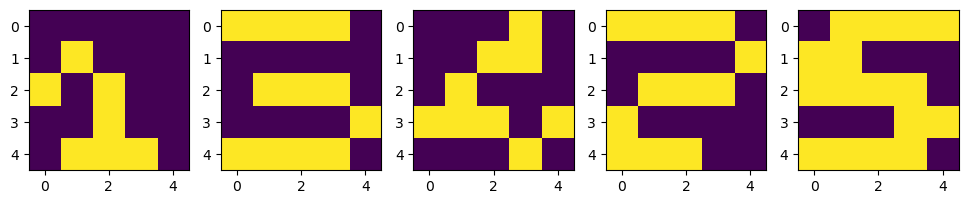

In [606]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:, :, n])
plt.show()

In [607]:
learning_result = [0,0,0,0,0]

for k in range(5):
    x = np.reshape(X_test[:, :, k], (25, 1))

    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis=0) +1

    print('Y = {}'.format(k + 1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('='*20)

Y = 1
[1]
[[9.60053410e-01]
 [1.51555097e-03]
 [3.14779718e-02]
 [2.71127833e-04]
 [6.68193901e-03]]
Y = 2
[4]
[[1.37644549e-04]
 [3.50900968e-15]
 [2.37113826e-01]
 [5.07083107e-01]
 [2.55665422e-01]]
Y = 3
[4]
[[2.91589556e-05]
 [6.51411750e-14]
 [1.04213058e-08]
 [9.99953033e-01]
 [1.77973588e-05]]
Y = 4
[2]
[[7.66789608e-09]
 [9.99990111e-01]
 [9.87951840e-06]
 [1.87050003e-09]
 [5.61299841e-12]]
Y = 5
[5]
[[8.71478287e-07]
 [2.05851806e-24]
 [4.73779239e-07]
 [5.42303648e-02]
 [9.45768290e-01]]


### 테스트 시각화

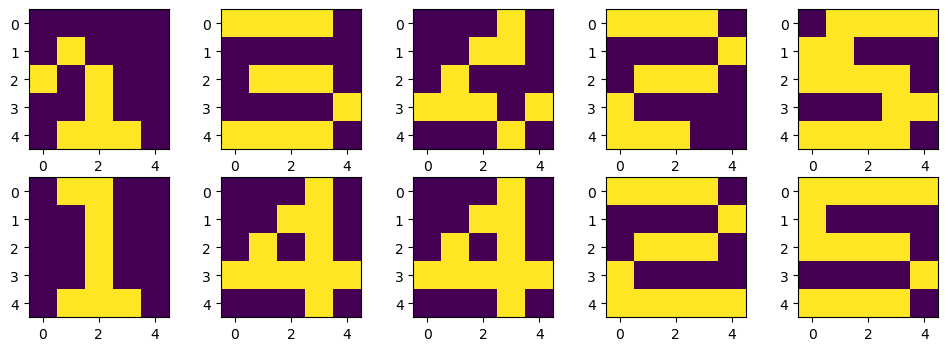

In [608]:
plt.figure(figsize=(12, 4))

for k in range(N):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:, :, learning_result[k][0]-1])

plt.show()

### dropout 함수 생성

In [610]:
a = np.array([0.1, 0.2, 0.5, 0.8, 0.6, 0.4, 0.3, 1, 2, 3, 4])

a.size, a.size * (1 - 0.8), round(a.size * (1 - 0.8))
# a.size : 11개
# a.size * (1 - 0.8) : 80% 제거 시 값
# round(a.size * (1 - 0.8)) : 80% 제거 후 반올림 값

(11, 2.1999999999999993, 2)

In [611]:
num = round(a.size * (1 - 0.8))
np.random.choice(a.size, num)
# y에서 num만큼만 남기겠다

array([7, 7])

In [612]:
def Dropout(y, ratio):
    ym = np.zeros_like(y)

    num = round(y.size * (1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym

### 정방향 계산 함수에 dropout 적용
- 활성화 함수 sigmoid 적용

In [613]:
def calcOutput_Dropout(W1 ,W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, y1, v1, y2, v2, y3, v3

### 역전파

In [614]:
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = y3 * (1 - y3) * e3 

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2 * (1 - y2) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = y1 * (1 - y1) * e1

    return delta, delta1 ,delta2, delta3

### dropout 적용 가중치 업데이트

In [615]:
def DeepDropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, y1, v1, y2, v2, y3, v3 = calcOutput_Dropout(W1 ,W2, W3, W4, x)
        # 선방향 출력
        delta, delta1, delta2, delta3 =  backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4)
        # 역전파(델타구하기)
        W1, W2, W3, W4 = CalcWs(alpha, delta, delta1, delta2, 
                                delta3, y1, y2, y3, x, W1, W2, W3, W4)
        # 가중치 갱신
        
    return W1, W2, W3, W4

### 재학습

In [616]:
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D)

C:\Users\user\AppData\Local\Temp\ipykernel_16748\365497707.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

### verify_algorithm 함수를 이용한 결과 출력 및 시각화

In [617]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [618]:
N = 5

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))

    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis=0) +1

    print('Y = {}'.format(k + 1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('='*20)

Y = 1
[1]
[[5.35062332e-01]
 [3.72016860e-05]
 [1.37370965e-02]
 [3.22430821e-03]
 [4.47939062e-01]]
Y = 2
[3]
[[2.64079508e-04]
 [3.02136004e-04]
 [9.46690534e-01]
 [8.90896125e-06]
 [5.27343412e-02]]
Y = 3
[4]
[[4.03142084e-04]
 [1.42043198e-04]
 [9.43298368e-06]
 [9.98904616e-01]
 [5.40765399e-04]]
Y = 4
[2]
[[5.21000854e-04]
 [9.56779165e-01]
 [4.25703144e-02]
 [1.27073313e-04]
 [2.44606319e-06]]
Y = 5
[5]
[[3.51091593e-05]
 [6.98461267e-07]
 [6.96183297e-03]
 [3.71384454e-05]
 [9.92965221e-01]]


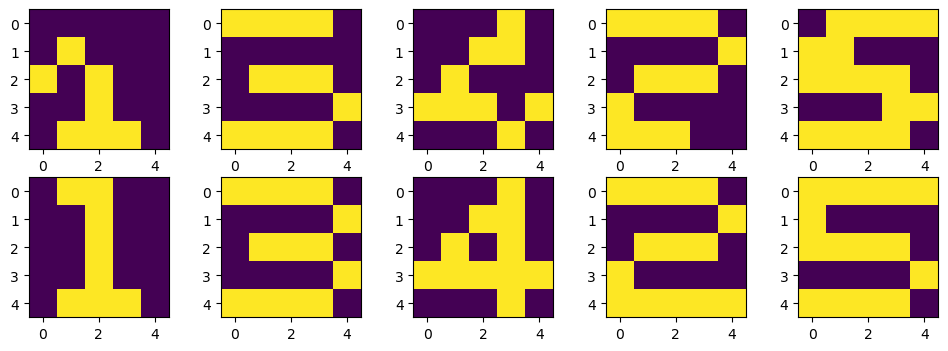

In [619]:
plt.figure(figsize=(12, 4))

for k in range(N):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:, :, learning_result[k][0]-1])

plt.show()